In [1]:
import pandas as pd
import seaborn as sns
import altair as alt
from matplotlib import pyplot as plt

# Location distribution by years in Ukraine and abroad

## Data preparation

In [2]:
df_students = pd.read_csv('../tables_creation/final_tables/students.csv', dtype={'KOATUU_2020': str, 'EDRPOU_school': str})
print(df_students.columns)
df_students = df_students[['outid', 'birth', 'sextypename', 'regtypename', 'KOATUU_2020', 'year', 'EDRPOU_school']]
df_students

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_84627/1622992108.py:1: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_students = pd.read_csv('../tables_creation/final_tables/students.csv', dtype={'KOATUU_2020': str, 'EDRPOU_school': str})


Index(['outid', 'birth', 'sextypename', 'classprofilename', 'regtypename',
       'classlangname', 'KOATUU_2020', 'EDRPOU_school', 'year'],
      dtype='object')


,outid,birth,sextypename,regtypename,KOATUU_2020,year,EDRPOU_school
0,a99c6c63-aa70-4aec-ba42-370f7261e857,1998,Male,A graduate of an Ukrainian school of the curre...,2323085101,2016,26373098
1,c3136421-569e-422e-ae8f-41c4c931fd70,1998,Female,A graduate of an Ukrainian school of the curre...,6822710100,2016,25880114
2,30de395e-7a74-452a-8370-6856d240fbfb,1999,Male,A graduate of an Ukrainian school of the curre...,7310100000,2016,21431046
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,1999,Female,A graduate of an Ukrainian school of the curre...,1411700000,2016,25705061
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,1999,Male,A graduate of an Ukrainian school of the curre...,6110100000,2016,14040173
...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,2003,Male,A graduate of previous years,5910400000,2023,NaN
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,1996,Female,A graduate of previous years,3221810100,2023,NaN
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,2004,Female,A graduate of previous years,5625410100,2023,NaN
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,2005,Female,A graduate of previous years,5110137500,2023,NaN


In [3]:
df_students['age'] = df_students['year']-df_students['birth']
df_students.drop('birth', axis = 1, inplace=True)
df_students

,outid,sextypename,regtypename,KOATUU_2020,year,EDRPOU_school,age
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,A graduate of an Ukrainian school of the curre...,2323085101,2016,26373098,18
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,A graduate of an Ukrainian school of the curre...,6822710100,2016,25880114,18
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,A graduate of an Ukrainian school of the curre...,7310100000,2016,21431046,17
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,A graduate of an Ukrainian school of the curre...,1411700000,2016,25705061,17
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,A graduate of an Ukrainian school of the curre...,6110100000,2016,14040173,17
...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,A graduate of previous years,5910400000,2023,NaN,20
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,A graduate of previous years,3221810100,2023,NaN,27
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,A graduate of previous years,5625410100,2023,NaN,19
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,A graduate of previous years,5110137500,2023,NaN,18


In [4]:
df_location = pd.read_csv('../tables_creation/final_tables/locations.csv', dtype={'KOATUU_2020': str, 'KATOTTG_2023': str})
df_location = df_location.drop_duplicates(subset=['KOATUU_2020'], keep='first')
df_location.head()

,KOATUU_2020,KATOTTG_2023,category,region_name
0,2323085101,UA23080270010078454,village,Zaporizka
1,6822710100,UA68040210010032567,town,Khmelnytska
2,1223881501,UA12140170040016918,village,Dnipropetrovska
3,7310100000,UA73060610010033137,town,Chernivetska
4,4822383001,UA48080050190079797,village,Mykolaivska


In [5]:
df_students = df_students.merge(df_location[['KOATUU_2020', 'region_name', 'KATOTTG_2023', 'category']], on = ['KOATUU_2020'], how = 'left')
df_students

,outid,sextypename,regtypename,KOATUU_2020,year,EDRPOU_school,age,region_name,KATOTTG_2023,category
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,A graduate of an Ukrainian school of the curre...,2323085101,2016,26373098,18,Zaporizka,UA23080270010078454,village
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,A graduate of an Ukrainian school of the curre...,6822710100,2016,25880114,18,Khmelnytska,UA68040210010032567,town
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,A graduate of an Ukrainian school of the curre...,7310100000,2016,21431046,17,Chernivetska,UA73060610010033137,town
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,A graduate of an Ukrainian school of the curre...,1411700000,2016,25705061,17,Donetska,UA14120030010055241,town
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,A graduate of an Ukrainian school of the curre...,6110100000,2016,14040173,17,Ternopilska,UA61040490010069060,town
...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,A graduate of previous years,5910400000,2023,NaN,20,Sumska,UA59020070010054283,town
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,A graduate of previous years,3221810100,2023,NaN,27,Kyivska,UA32100010010059200,town
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,A graduate of previous years,5625410100,2023,NaN,19,Rivnenska,UA56080170010061049,town
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,A graduate of previous years,5110137500,2023,NaN,18,Odeska,UA51100270010320268,city


In [6]:
df_students['abroad'] = df_students['KATOTTG_2023'].map(lambda x: 1 if x[:2] == 'OC' else 0)
df_students.drop(['KATOTTG_2023', 'KOATUU_2020'], axis = 1, inplace=True)
df_students

,outid,sextypename,regtypename,year,EDRPOU_school,age,region_name,category,abroad
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,A graduate of an Ukrainian school of the curre...,2016,26373098,18,Zaporizka,village,0
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,A graduate of an Ukrainian school of the curre...,2016,25880114,18,Khmelnytska,town,0
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,A graduate of an Ukrainian school of the curre...,2016,21431046,17,Chernivetska,town,0
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,A graduate of an Ukrainian school of the curre...,2016,25705061,17,Donetska,town,0
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,A graduate of an Ukrainian school of the curre...,2016,14040173,17,Ternopilska,town,0
...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,A graduate of previous years,2023,NaN,20,Sumska,town,0
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,A graduate of previous years,2023,NaN,27,Kyivska,town,0
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,A graduate of previous years,2023,NaN,19,Rivnenska,town,0
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,A graduate of previous years,2023,NaN,18,Odeska,city,0


In [7]:
pivot = pd.pivot_table(df_students, index = ['sextypename'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid                                                        
year           2016    2017    2018    2019    2020    2021    2022    2023
sextypename                                                                
Female       141626  127637  168582  175647  187488  193073  122311  148941
Male         126376  113252  167105  178166  191811  196250  111793  139994

In [8]:
total_pivot = [len(df_students[df_students['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                       
year         2016  2017 2018 2019  2020 2021  2022  2023
sextypename                                             
Female       0.53  0.53  0.5  0.5  0.49  0.5  0.52  0.52
Male         0.47  0.47  0.5  0.5  0.51  0.5  0.48  0.48

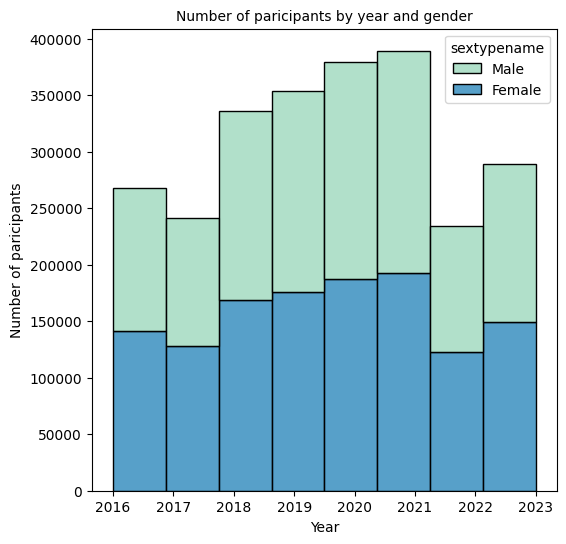

In [9]:
# set size of plot
plt.figure(figsize=(6, 6))

# viz as stack plot
sns.histplot(data=df_students, x='year', hue='sextypename', multiple='stack', palette='YlGnBu', shrink=1, bins=8)
plt.title('Number of paricipants by year and gender', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of paricipants', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

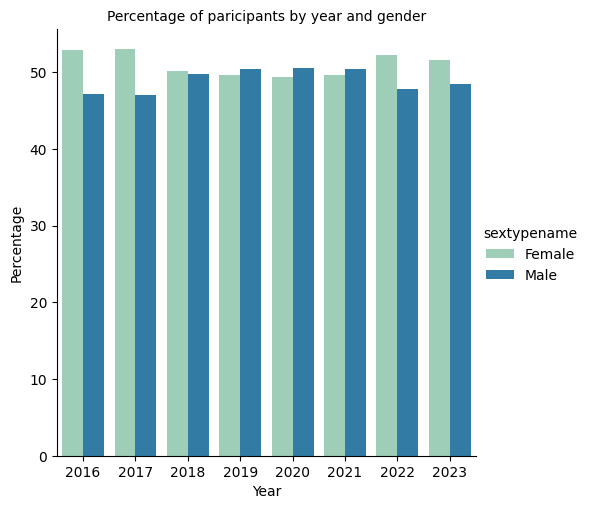

In [10]:
x,y = 'year', 'sextypename'

df_students.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and gender', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [11]:
pivot = pd.pivot_table(df_students, index = ['category'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid                                                   \
year              2016     2017      2018      2019      2020      2021   
category                                                                  
abroad             NaN      NaN       NaN       NaN       NaN       NaN   
city           79806.0  76950.0  117117.0  126803.0  134833.0  137999.0   
settlement      1774.0   1217.0    1282.0    1260.0    1502.0    1457.0   
town           79382.0  75328.0  128282.0  136204.0  143390.0  146191.0   
urban village  21913.0  21385.0   26873.0   27765.0   30312.0   31515.0   
village        85127.0  66009.0   62133.0   61781.0   69262.0   72161.0   

                                  
year              2022      2023  
category                          
abroad             NaN    3694.0  
city           85432.0  109226.0  
settlement       591.0     518.0  
town           85391.0  113320.0  
urban village  18778.0   20429.0  
village        43912.0   41748.0

In [12]:
total_pivot = [len(df_students[df_students['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                          
year           2016  2017  2018  2019  2020  2021  2022  2023
category                                                     
abroad          NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.01
city           0.30  0.32  0.35  0.36  0.36  0.35  0.36  0.38
settlement     0.01  0.01  0.00  0.00  0.00  0.00  0.00  0.00
town           0.30  0.31  0.38  0.38  0.38  0.38  0.36  0.39
urban village  0.08  0.09  0.08  0.08  0.08  0.08  0.08  0.07
village        0.32  0.27  0.19  0.17  0.18  0.19  0.19  0.14

In [13]:
df_students.category = df_students.category.map(lambda x: 'village' if x == 'settlement' or x == 'urban village' else x)

In [14]:
pivot = pd.pivot_table(df_students, index = ['category'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(df_students[df_students['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                          
year      2016  2017  2018  2019  2020  2021  2022  2023
category                                                
abroad     NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.01
city      0.30  0.32  0.35  0.36  0.36  0.35  0.36  0.38
town      0.30  0.31  0.38  0.38  0.38  0.38  0.36  0.39
village   0.41  0.37  0.27  0.26  0.27  0.27  0.27  0.22

In [15]:
df_students['is_rural'] = df_students.category.map(lambda x: 'yes' if x == 'village' else 'no')

In [16]:
pivot = pd.pivot_table(df_students, index = ['is_rural'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(df_students[df_students['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                          
year      2016  2017  2018  2019  2020  2021  2022  2023
is_rural                                                
no        0.59  0.63  0.73  0.74  0.73  0.73  0.73  0.78
yes       0.41  0.37  0.27  0.26  0.27  0.27  0.27  0.22

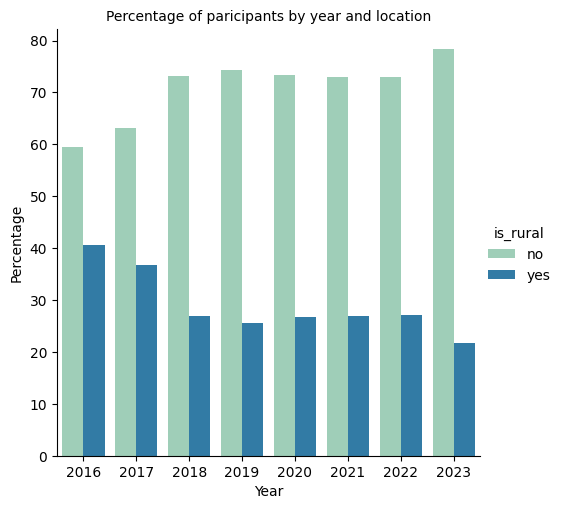

In [17]:
x,y = 'year', 'is_rural'

df_students.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and location', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [18]:
df_schools = pd.read_csv('../tables_creation/final_tables/schools_edrpou.csv', dtype={'KOATUU_2020': str, 'EDRPOU': str})
df_schools

,KOATUU_2020,EDRPOU,year
0,0510100000,04601943,2023
1,0510100000,00419667,2022
2,0510100000,03065891,2018
3,0510100000,03065891,2019
4,0510100000,03065891,2020
...,...,...,...
82395,8039100000,26125905,2017
82396,8039100000,26125940,2020
82397,8039100000,26125940,2021
82398,8039100000,26125940,2022


In [19]:
df_schools = df_schools.drop_duplicates(subset=['EDRPOU', 'year'], keep='first')
df_schools.head()

,KOATUU_2020,EDRPOU,year
0,0510100000,04601943,2023
1,0510100000,00419667,2022
2,0510100000,03065891,2018
3,0510100000,03065891,2019
4,0510100000,03065891,2020


In [20]:
df_schools = df_schools.rename(columns = { 'EDRPOU':'EDRPOU_school'})
df_schools

,KOATUU_2020,EDRPOU_school,year
0,0510100000,04601943,2023
1,0510100000,00419667,2022
2,0510100000,03065891,2018
3,0510100000,03065891,2019
4,0510100000,03065891,2020
...,...,...,...
82395,8039100000,26125905,2017
82396,8039100000,26125940,2020
82397,8039100000,26125940,2021
82398,8039100000,26125940,2022


In [21]:
df_students = df_students.merge(df_schools[['year', 'EDRPOU_school']], on = ['EDRPOU_school', 'year'], how = 'left')
df_students

,outid,sextypename,regtypename,year,EDRPOU_school,age,region_name,category,abroad,is_rural
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,A graduate of an Ukrainian school of the curre...,2016,26373098,18,Zaporizka,village,0,yes
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,A graduate of an Ukrainian school of the curre...,2016,25880114,18,Khmelnytska,town,0,no
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,A graduate of an Ukrainian school of the curre...,2016,21431046,17,Chernivetska,town,0,no
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,A graduate of an Ukrainian school of the curre...,2016,25705061,17,Donetska,town,0,no
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,A graduate of an Ukrainian school of the curre...,2016,14040173,17,Ternopilska,town,0,no
...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,A graduate of previous years,2023,NaN,20,Sumska,town,0,no
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,A graduate of previous years,2023,NaN,27,Kyivska,town,0,no
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,A graduate of previous years,2023,NaN,19,Rivnenska,town,0,no
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,A graduate of previous years,2023,NaN,18,Odeska,city,0,no


In [22]:
df_st_take_test = pd.read_csv('../tables_creation/final_tables/students_take_tests.csv',  dtype={'KOATUU_2020_test_center': str, 'EDRPOU_test_center':str})
# df_st_take_test.dropna(subset = ['KOATUU_2020_test_center'], inplace=True)
df_st_take_test = df_st_take_test[df_st_take_test.test_status != 'Not registered for the main session']
df_st_take_test

,outid,year,score100,score12,score,test_status,test_subject,test_type,KOATUU_2020_test_center,EDRPOU_test_center
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,5110137300,20995060
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,1810700000,22061344
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,7110136400,25922746
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,6310136600,24486622
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,4611200000,34387362
...,...,...,...,...,...,...,...,...,...,...
10597971,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,2110800000,26325975
10597972,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,7410400000,02125668
10597973,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,4810136300,05537288
10597974,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,4825710100,26117159


In [23]:
df_st_take_test.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KOATUU_2020_test_center',
       'EDRPOU_test_center'],
      dtype='object')

In [24]:
df_location_centers = df_location.rename(columns = {'KOATUU_2020':'KOATUU_2020_test_center', 'region_name':'region_name_test_center', 'KATOTTG_2023':'KATOTTG_2023_test_center', 'category':'category_test_center'})
df_location_centers

,KOATUU_2020_test_center,KATOTTG_2023_test_center,category_test_center,region_name_test_center
0,2323085101,UA23080270010078454,village,Zaporizka
1,6822710100,UA68040210010032567,town,Khmelnytska
2,1223881501,UA12140170040016918,village,Dnipropetrovska
3,7310100000,UA73060610010033137,town,Chernivetska
4,4822383001,UA48080050190079797,village,Mykolaivska
...,...,...,...,...
18485,0034010000,OC34010000000000000,abroad,Sweden
18486,0024020000,OC24020000000000000,abroad,Slovakia
18487,0018010000,OC18010000000000000,abroad,Netherlands
18488,0016010000,OC16010000000000000,abroad,Luxembourg


In [25]:
df_location_centers.columns

Index(['KOATUU_2020_test_center', 'KATOTTG_2023_test_center',
       'category_test_center', 'region_name_test_center'],
      dtype='object')

In [26]:
df_st_test_centers = df_st_take_test.merge(df_location_centers[['KOATUU_2020_test_center', 'region_name_test_center', 'KATOTTG_2023_test_center']], on = ['KOATUU_2020_test_center'], how = 'left')
df_st_test_centers

,outid,year,score100,score12,score,test_status,test_subject,test_type,KOATUU_2020_test_center,EDRPOU_test_center,region_name_test_center,KATOTTG_2023_test_center
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,5110137300,20995060,Odeska,UA51100270010275193
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,1810700000,22061344,Zhytomyrska,UA18060090010074365
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,7110136400,25922746,Cherkaska,UA71080490010144486
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,6310136600,24486622,Kharkivska,UA63120270010216514
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,4611200000,34387362,Lvivska,UA46100230010074173
...,...,...,...,...,...,...,...,...,...,...,...,...
8260196,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,2110800000,26325975,Zakarpatska,UA21120250010053148
8260197,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,7410400000,02125668,Chernihivska,UA74040250010023991
8260198,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,4810136300,05537288,Mykolaivska,UA48060150010139573
8260199,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,4825710100,26117159,Mykolaivska,UA48020190010089719


In [27]:
sum(df_st_test_centers['KOATUU_2020_test_center'].isna())

0

In [28]:
df_st_test_centers['abroad_test_center'] = df_st_test_centers['KATOTTG_2023_test_center'].map(lambda x: 1 if x[:2] == 'OC' else 0)
df_st_test_centers.drop(['KATOTTG_2023_test_center', 'KOATUU_2020_test_center', 'EDRPOU_test_center'], axis = 1, inplace=True)
df_st_test_centers

,outid,year,score100,score12,score,test_status,test_subject,test_type,region_name_test_center,abroad_test_center
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,Odeska,0
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,Zhytomyrska,0
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,Cherkaska,0
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,Kharkivska,0
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,Lvivska,0
...,...,...,...,...,...,...,...,...,...,...
8260196,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,Zakarpatska,0
8260197,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,Chernihivska,0
8260198,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,Mykolaivska,0
8260199,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,Mykolaivska,0


In [29]:
df = df_st_test_centers.merge(df_students, on = ['outid', 'year'], how = 'left')
df

,outid,year,score100,score12,score,test_status,test_subject,test_type,region_name_test_center,abroad_test_center,sextypename,regtypename,EDRPOU_school,age,region_name,category,abroad,is_rural
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,Odeska,0,Female,A graduate of an Ukrainian school of the curre...,23864660,17,Odeska,city,0,no
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,Zhytomyrska,0,Male,A graduate of an Ukrainian school of the curre...,22056432,17,Zhytomyrska,village,0,yes
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,Cherkaska,0,Male,graduate of a vocational school,05538052,19,Cherkaska,city,0,no
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,Kharkivska,0,Male,A graduate of an Ukrainian school of the curre...,23320374,18,Kharkivska,city,0,no
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,Lvivska,0,Male,A graduate of an Ukrainian school of the curre...,20773804,17,Lvivska,town,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8260196,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,Zakarpatska,0,Female,A graduate of an Ukrainian school of the curre...,26325886,17,Zakarpatska,town,0,no
8260197,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,Chernihivska,0,Female,A graduate of an Ukrainian school of the curre...,33439420,17,Chernihivska,town,0,no
8260198,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,Mykolaivska,0,Female,graduate of a vocational school,02546140,24,Mykolaivska,village,0,yes
8260199,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,Mykolaivska,0,Male,graduate of a vocational school,02545991,18,Mykolaivska,village,0,yes


## Analysis by subject

In [30]:
subj= pd.pivot_table(df, index = ['test_subject'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(df[df['year']==year].outid.unique()) for year in range(2016, 2024)]

subj.div(total).round(2)

outid                                         
year          2016  2017  2018  2019  2020  2021 2022  2023
test_subject                                               
biotest       0.29  0.37  0.25  0.23  0.30  0.33  NaN  0.14
chemtest      0.11  0.10  0.07  0.04  0.04  0.03  NaN  0.01
deutest       0.01  0.01  0.01  0.01  0.01  0.01  NaN  0.01
engtest       0.32  0.35  0.27  0.27  0.31  0.38  NaN  0.30
fratest       0.00  0.00  0.00  0.00  0.00  0.00  NaN  0.00
geotest       0.21  0.31  0.24  0.23  0.35  0.45  NaN   NaN
histtest      0.72  0.76  0.50  0.66  0.70  0.77  1.0  0.53
mathsttest     NaN   NaN   NaN   NaN   NaN  0.20  NaN   NaN
mathtest      0.49  0.47  0.33  0.45  0.49  0.75  1.0  1.00
phystest      0.12  0.11  0.07  0.07  0.07  0.08  NaN  0.02
rustest       0.01  0.01   NaN   NaN   NaN   NaN  NaN   NaN
spatest       0.00  0.00  0.00  0.00  0.00  0.00  NaN  0.00
ukrtest       1.00  1.00  0.99  0.99  0.97  0.96  1.0  1.00
umltest        NaN   NaN   NaN   NaN   NaN  0.64  NaN   NaN

### Math

In [31]:
df_math = df[df.test_subject == 'mathtest']
sum(df_math.duplicated())

0

In [32]:
df_math.head()

,outid,year,score100,score12,score,test_status,test_subject,test_type,region_name_test_center,abroad_test_center,sextypename,regtypename,EDRPOU_school,age,region_name,category,abroad,is_rural
4181284,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,mathtest,EIE,Zhytomyrska,0,Male,A graduate of an Ukrainian school of the curre...,22056432,17,Zhytomyrska,village,0,yes
4181285,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,181.0,11.0,NaN,Accepted,mathtest,EIE,Kharkivska,0,Male,A graduate of an Ukrainian school of the curre...,23320374,18,Kharkivska,city,0,no
4181286,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,172.0,9.0,42.0,Accepted,mathtest,EIE,Lvivska,0,Male,A graduate of an Ukrainian school of the curre...,20773804,17,Lvivska,town,0,no
4181287,0000333c-efa3-42a7-9f45-e77b53346d57,2020,117.0,5.0,14.0,Accepted,mathtest,EIE,Donetska,0,Male,A student of a higher education institution,04601943,18,Donetska,town,0,no
4181288,00004713-8ed1-4ffa-a082-b6b3acf03b67,2020,103.0,4.0,10.0,Accepted,mathtest,EIE,Lvivska,0,Male,graduate of a vocational school,02545659,19,Lvivska,city,0,no


In [33]:
pd.pivot_table(df_math, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')

outid                                        \
year                      2016     2017     2018      2019      2020   
test_status                                                            
Absent                  9117.0   6795.0   5539.0    5463.0   33991.0   
Accepted              104797.0  88814.0  86692.0  127093.0  132734.0   
Canceled                 142.0     57.0    111.0     117.0      34.0   
Failed                 18108.0  17454.0  19681.0   28109.0   19313.0   
Not selected 100-200       NaN      NaN      NaN       NaN       NaN   

                                                    
year                      2021      2022      2023  
test_status                                         
Absent                 47247.0   19997.0   20716.0  
Accepted              168369.0  213805.0  256741.0  
Canceled                 208.0      33.0      91.0  
Failed                 75833.0     269.0   11387.0  
Not selected 100-200     132.0       NaN       NaN

In [34]:
df_math = df_math[~df_math.test_status.isin(['Absent', 'Not selected 100-200'])]
df_math

,outid,year,score100,score12,score,test_status,test_subject,test_type,region_name_test_center,abroad_test_center,sextypename,regtypename,EDRPOU_school,age,region_name,category,abroad,is_rural
4181285,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,181.0,11.0,NaN,Accepted,mathtest,EIE,Kharkivska,0,Male,A graduate of an Ukrainian school of the curre...,23320374,18,Kharkivska,city,0,no
4181286,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,172.0,9.0,42.0,Accepted,mathtest,EIE,Lvivska,0,Male,A graduate of an Ukrainian school of the curre...,20773804,17,Lvivska,town,0,no
4181287,0000333c-efa3-42a7-9f45-e77b53346d57,2020,117.0,5.0,14.0,Accepted,mathtest,EIE,Donetska,0,Male,A student of a higher education institution,04601943,18,Donetska,town,0,no
4181288,00004713-8ed1-4ffa-a082-b6b3acf03b67,2020,103.0,4.0,10.0,Accepted,mathtest,EIE,Lvivska,0,Male,graduate of a vocational school,02545659,19,Lvivska,city,0,no
4181289,000051f8-9476-49b5-83c2-4797a201b706,2021,133.0,6.0,21.0,Accepted,mathtest,EIE,Lvivska,0,Female,A graduate of an Ukrainian school of the curre...,22375255,18,Lvivska,village,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700267,ffff8e58-5322-4b21-a385-d1fee504c2a8,2021,122.0,5.0,16.0,Accepted,mathtest,EIE,Odeska,0,Male,A graduate of an Ukrainian school of the curre...,25417118,17,Odeska,town,0,no
5700268,ffffb2e5-b2a1-4f51-871b-d281c20e72e8,2019,104.0,4.0,12.0,Accepted,mathtest,EIE,Kyivska,0,Male,A graduate of an Ukrainian school of the curre...,25667248,17,Kyivska,village,0,yes
5700270,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,128.0,NaN,5.0,Accepted,mathtest,NMT,Zhytomyrska,0,Female,Student of a higher/vocational pre-higher educ...,00727989,17,Zhytomyrska,village,0,yes
5700271,ffffeeb2-7258-4465-bca3-88dd19902340,2019,180.0,10.0,46.0,Accepted,mathtest,EIE,Dnipropetrovska,0,Male,A graduate of an Ukrainian school of the curre...,26509416,17,Dnipropetrovska,city,0,no


In [35]:
# def convert_not_selected(row):
#     if row['test_status'] == 'Not selected 100-200':
#         return 'Failed' if row['score12'] <= 2 else 'Accepted'
#     if row['test_status'] == 'Canceled':
#         return 'Failed'
#     return row['test_status']

# df_math['test_status'] = df_math[['test_status', 'score12']].apply(convert_not_selected, axis=1)
df_math['test_status'] = df_math['test_status'].map(lambda x: 'Failed' if x == 'Canceled' else x)

In [36]:
pivot = pd.pivot_table(df_math, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

outid                                                      
year           2016   2017   2018    2019    2020    2021    2022    2023
test_status                                                              
Accepted     104797  88814  86692  127093  132734  168369  213805  256741
Failed        18250  17511  19792   28226   19347   76041     302   11478

In [37]:
total_pivot = [len(df_math[df_math['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                         
year         2016  2017  2018  2019  2020  2021 2022  2023
test_status                                               
Accepted     0.85  0.84  0.81  0.82  0.87  0.69  1.0  0.96
Failed       0.15  0.16  0.19  0.18  0.13  0.31  0.0  0.04

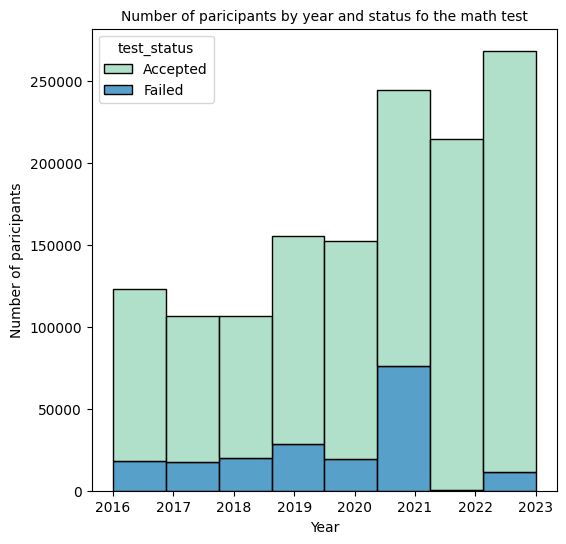

In [38]:
# set size of plot
plt.figure(figsize=(6, 6))

# viz as stack plot
sns.histplot(data=df_math, x='year', hue='test_status', multiple='stack', palette='YlGnBu', shrink=1, bins=8)
plt.title('Number of paricipants by year and status fo the math test', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of paricipants', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

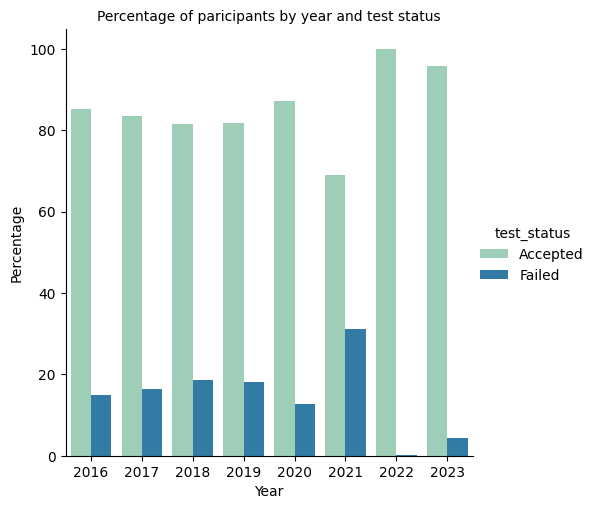

In [39]:
x,y = 'year', 'test_status'

df_math.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and test status', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

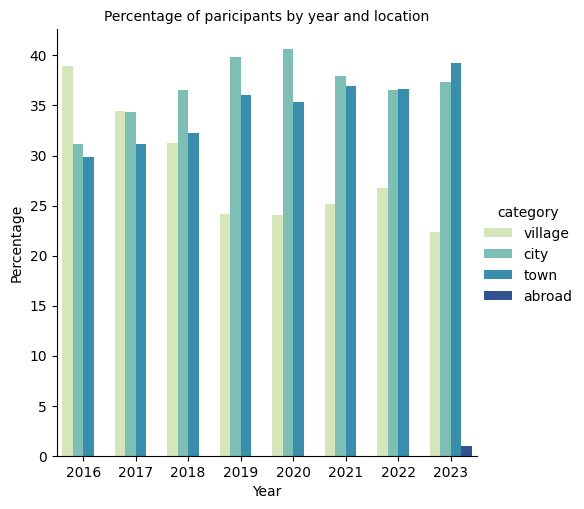

In [40]:
x,y = 'year', 'category'

df_math.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and location', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

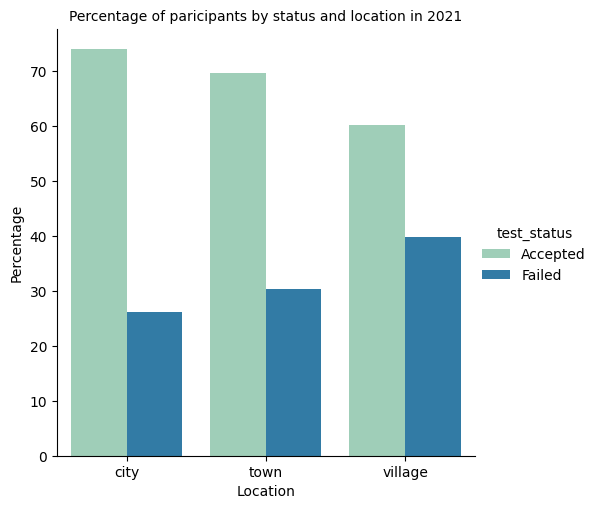

In [41]:
x,y = 'category', 'test_status'
year = 2021
df_math[df_math.year==year].groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title(f'Percentage of paricipants by status and location in {year}', fontsize=10)
plt.xlabel('Location', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

PISA2018: In Ukraine, girls scored similar to boys in mathematics. 

In [42]:
dct = {'гімназія':'school', 
       'навчально-виховний комплекс':'school', 
       'заклад вищої освіти':'prof',
       'вище професійне училище':'prof', 
       'середня загальноосвітня школа':'school',
       'ліцей':'school', 
       'спеціалізована школа':'school',
       'спеціалізована школа-інтернат':'school',
       'заклад фахової передвищої освіти':'prof',
       'професійний ліцей відповідного профілю':'school',
       'заклад професійної (професійно-технічної) освіти':'prof',
       "навчально-виховне об'єднання":'school', 
       'колегіум':'school',
       'центр професійної освіти':'prof',
       'професійно-технічне училище відповідного профілю':'prof',
       'центр професійно-технічної освіти':'prof',
       'загальноосвітня санаторна школа':'school',
       'вищий навчальний заклад I-II рівнів акредитації':'prof',
       'вечірня (змінна) школа':'school', 
       'середня загальноосвітня школа-інтернат':'school',
       'науковий ліцей':'school', 
       'колегіум/колеж':'school',
       'центр підготовки і перепідготовки робітничих кадрів':'prof', 
       'коледж':'prof',
       'ліцей із посиленою військово-фізичною підготовкою':'school',
       'спеціальна загальноосвітня школа':'school',
       'військовий (військово-морський, військово-спортивний) ліцей':'school',
       'колеж':'school', 
       'спеціальна загальноосвітня школа-інтернат':'school',
       'вище художнє професійно-технічне училище':'prof', 
       'спортивний ліцей':'school',
       'Пеніціарна установа':'school', 
       'спеціальна школа':'school', 
       'мистецький ліцей':'school',
       'навчально-реабілітаційний центр':'school', 
       'Пенітенціарна установа':'school',
       'школа соціальної реабілітації':'school',
       'вищий навчальний заклад III-IV рівнів акредитації':'univ',
       'початкова школа':'school'}

In [43]:
# for old_name, new_name in dct.items():
#     df_math.loc[df_math.eotypename==old_name, 'eotypename'] = new_name

AttributeError: 'DataFrame' object has no attribute 'eotypename'

In [ ]:
# df_math_year.eotypename.unique()

In [ ]:
# year = 2023

# import numpy as np
# import scipy.stats as stats

# df_math_year=df_math[(df_math['year'] == year)&(df_math.score.notna())]

# grouped = df_math_year.groupby(['EDRPOU_school', 'eotypename'])['score'].agg(['mean', 'count', 'std']).reset_index()
# grouped.rename(columns={'mean': 'mean_score', 'count': 'student_count', 'std': 'std_dev'}, inplace=True)

# student_counts = df_math_year['EDRPOU_school'].value_counts()
# df_math_year = df_math_year.merge(student_counts.rename('student_count'), left_on='EDRPOU_school', right_index=True)

# # Group by 'student_count' and calculate mean score, standard deviation and number of schools
# aggregated = df_math_year.groupby('student_count')['score'].agg(['mean', 'std', 'count']).reset_index()
# aggregated = aggregated[aggregated.student_count <500]
# # Function to calculate confidence interval margin
# def calculate_confidence_interval_margin(std_dev, n, confidence_level):
#     z = stats.norm.ppf(confidence_level)
#     print(z)
#     return z * (std_dev/np.sqrt(n))

# mean = df_math_year[df_math_year.student_count <500].score.mean()
# std = df_math_year[df_math_year.student_count <500].score.std()

# print(mean, std)
# # aggregated['margin_95'] = calculate_confidence_interval_margin(aggregated['std'], aggregated['student_count'], 0.975)  # 0.975 for 95% confidence interval
# # aggregated['margin_998'] = calculate_confidence_interval_margin(aggregated['std'], aggregated['student_count'], 0.999)  # 0.999 for 99.8% confidence interval
# aggregated['margin_95'] = calculate_confidence_interval_margin(std, aggregated['student_count'], 0.975)  # 0.975 for 95% confidence interval
# aggregated['margin_998'] = calculate_confidence_interval_margin(std, aggregated['student_count'], 0.999)  # 0.999 for 99.8% confidence interval

# # Create scatter plot
# # plt.scatter(grouped['student_count'], grouped['mean_score'])
# sns.scatterplot(grouped[grouped.student_count <500], x='student_count', y="mean_score", hue='eotypename')

# # sns.lineplot(data=grouped[grouped.student_count <800], x="student_count", y="margin_95")
# plt.plot(aggregated['student_count'], mean + aggregated['margin_95'], 'r--', label='95% Confidence Interval')
# plt.plot(aggregated['student_count'], mean - aggregated['margin_95'], 'r--')
# plt.plot(aggregated['student_count'], mean + aggregated['margin_998'], 'g:', label='99.8% Confidence Interval')
# plt.plot(aggregated['student_count'], mean - aggregated['margin_998'], 'g:')



# # Adding labels and title for clarity
# plt.xlabel('Number of Students')
# plt.ylabel('Mean Score')
# plt.title('Mean Score by School Size')

# # Show the plot
# plt.show()

In [ ]:
# year = 2023
# import numpy as np
# import scipy.stats as stats

# df_math_year=df_math[(df_math['year'] == year)&(df_math.score.notna())]

# grouped = df_math_year.groupby('EDRPOU_school')['score'].agg(['mean', 'count', 'std']).reset_index()
# grouped.rename(columns={'mean': 'mean_score', 'count': 'student_count', 'std': 'std_dev'}, inplace=True)

# student_counts = df_math_year['EDRPOU_school'].value_counts()
# df_math_year = df_math_year.merge(student_counts.rename('student_count'), left_on='EDRPOU_school', right_index=True)

# # Group by 'student_count' and calculate mean score, standard deviation and number of schools
# aggregated = df_math_year.groupby('student_count')['score'].agg(['mean', 'std', 'count']).reset_index()
# aggregated = aggregated[aggregated.student_count <400]
# # Overall mean proportion
# aggregated['proportion'] = aggregated['count'] / aggregated['count'].sum()

# prop = df_math_year.score.sum()/df_math_year.shape[0]/50
# print(prop)
# mean_proportion = aggregated['proportion'].mean()

# # Standard Error
# # SE = np.sqrt(mean_proportion * (1 - mean_proportion) / aggregated['student_count'])
# SE = np.sqrt(prop * (1 - prop) / aggregated['student_count'])
# # Confidence limits
# z_95 = stats.norm.ppf(0.975)  # Z-score for 80% confidence interval
# z_99 = stats.norm.ppf(0.999)  # Z-score for 95% confidence interval

# upper_95 = prop + z_95 * SE
# lower_95 = prop - z_95 * SE
# upper_99 = prop + z_99 * SE
# lower_99 = prop - z_99 * SE
# # Create scatter plot
# # plt.scatter(grouped['student_count'], grouped['mean_score'])
# sns.scatterplot(grouped[grouped.student_count <400], x='student_count', y="mean_score")
# # Plotting the funnel plot
# # plt.scatter(aggregated['student_count'], aggregated['proportion'], color='blue')
# plt.plot(aggregated['student_count'], 50*upper_95, 'r--', label='95% Confidence Interval')
# plt.plot(aggregated['student_count'], 50*lower_95, 'r--')
# plt.plot(aggregated['student_count'], 50*upper_99, 'g:', label='99% Confidence Interval')
# plt.plot(aggregated['student_count'], 50*lower_99, 'g:')

# plt.xlabel('Student Count')
# plt.ylabel('Proportion of Schools')
# plt.title('Funnel Plot with 95% and 99% Confidence Limits')
# plt.legend()
# plt.show()

## Ukrainian

In [ ]:
df_ukr = df[df.test_subject == 'ukrtest']
sum(df_ukr.duplicated())

In [ ]:
pd.pivot_table(df_ukr, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')

In [ ]:
df_ukr = df_ukr[~df_ukr.test_status.isin(['Absent', 'Not selected 100-200'])]
df_ukr

In [ ]:
df_ukr['test_status'] = df_ukr['test_status'].map(lambda x: 'Failed' if x == 'Canceled' else x)

In [ ]:
pivot = pd.pivot_table(df_ukr, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')
pivot

In [ ]:
total_pivot = [len(df_ukr[df_ukr['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

In [ ]:
# set size of plot
plt.figure(figsize=(6, 6))

# viz as stack plot
sns.histplot(data=df_ukr, x='year', hue='test_status', multiple='stack', palette='YlGnBu', shrink=1, bins=8)
plt.title('Number of paricipants by year and status fo the math test', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of paricipants', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
x,y = 'year', 'test_status'

df_ukr.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and test status', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
x,y = 'year', 'category'

df_ukr.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title('Percentage of paricipants by year and location', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
x,y = 'category', 'test_status'
year = 2021
df_ukr[df_ukr.year==year].groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='YlGnBu')

plt.title(f'Percentage of paricipants by status and location in {year}', fontsize=10)
plt.xlabel('Location', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
df[(df.test_subject=='mathtest')&(df.test_status=='Accepted')&(df.year==2018)&(df.age.isin([16,17]))].shape

Text(0.5, 0.98, 'Distribution of the scores of participants (16-17 years old) by test and gender in 2022')

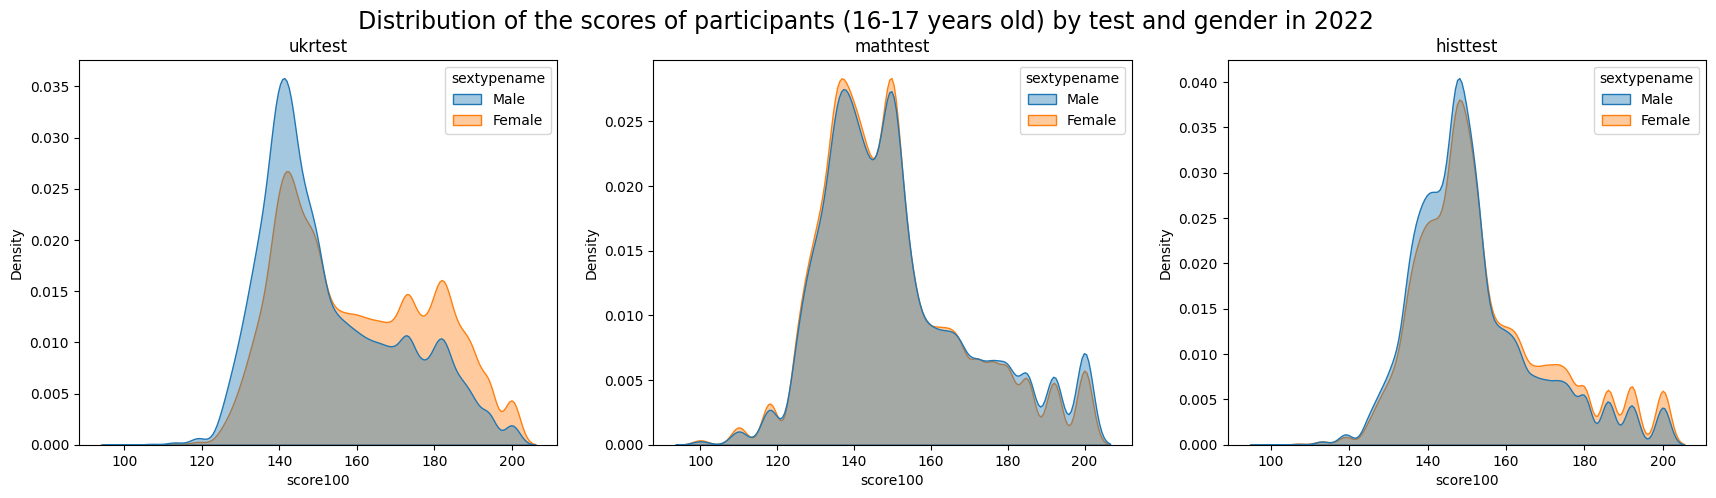

In [47]:
subjects = ['ukrtest', 'mathtest', 'histtest']
year = 2022

fig, axs = plt.subplots(ncols=3,figsize=(21,5))

for i, subject in enumerate(subjects):
    sns.kdeplot(data=df[(df.test_subject==subject)&(df.test_status=='Accepted')&(df.year==year)&(df.age.isin([16,17]))], x="score100", hue="sextypename", fill=True, common_norm=False, alpha=0.4, ax=axs[i])
    axs[i].set_title(f'{subject}')

plt.suptitle(f'Distribution of the scores of participants (16-17 years old) by test and gender in {year}', fontsize=17)

<div>
<img src="PISA2018.png" width="500"/>
</div>

Text(0.5, 0.98, 'Distribution of scores by test and location in 2018')

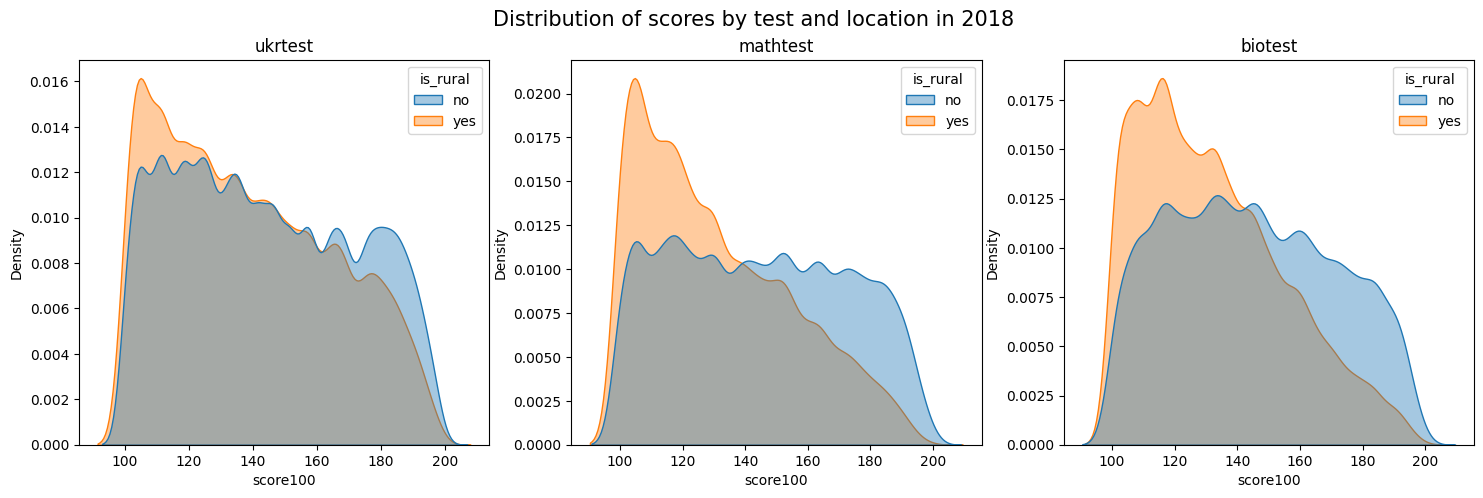

In [48]:
subjects = ['ukrtest', 'mathtest', 'biotest']
year = 2022

fig, axs = plt.subplots(ncols=3,figsize=(18,5))

for i, subject in enumerate(subjects):
    sns.kdeplot(data=df[(df.test_subject==subject)&(df.test_status=='Accepted')&(df.year==year)&(df.age.isin([16,17]))], x="score100", hue="is_rural", fill=True, common_norm=False, alpha=0.4, ax=axs[i])
    axs[i].set_title(f'{subject}')
    # axs[i].legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
# _ = fig.legend(bbox_to_anchor=(0.92, 0.5), loc="center left")

plt.suptitle(f'Distribution of scores by test and location in {year}', fontsize=15)